In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Import citipy module
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cascais
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | eyl
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | coihaique
Processing Record 10 of Set 1 | fairbanks
Processing Record 11 of Set 1 | kloulklubed
Processing Record 12 of Set 1 | aitape
Processing Record 13 of Set 1 | lufilufi
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | goderich
Processing Record 17 of Set 1 | dolores
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | ennis
Processing Record 20 of Set 1 | thinadhoo
Processing Record 21 of Set 1 | pangnirtung
Processing Record 22 of Se

Processing Record 39 of Set 4 | port macquarie
Processing Record 40 of Set 4 | qaanaaq
Processing Record 41 of Set 4 | qandala
Processing Record 42 of Set 4 | oranjemund
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | sinnamary
Processing Record 45 of Set 4 | tuktoyaktuk
Processing Record 46 of Set 4 | makaryev
Processing Record 47 of Set 4 | touros
Processing Record 48 of Set 4 | tikapur
Processing Record 49 of Set 4 | shingu
Processing Record 50 of Set 4 | rawson
Processing Record 1 of Set 5 | luneburg
Processing Record 2 of Set 5 | palu
Processing Record 3 of Set 5 | laguna
Processing Record 4 of Set 5 | olafsvik
Processing Record 5 of Set 5 | deputatskiy
Processing Record 6 of Set 5 | megion
Processing Record 7 of Set 5 | ballina
Processing Record 8 of Set 5 | nguiu
City not found. Skipping...
Processing Record 9 of Set 5 | linfen
Processing Record 10 of Set 5 | nakhon thai
Processing Record 11 of Set 5 | voh
Processing Record 12 of Set 5 | hagere sela

Processing Record 27 of Set 8 | esperance
Processing Record 28 of Set 8 | mitsamiouli
Processing Record 29 of Set 8 | berlevag
Processing Record 30 of Set 8 | mareeba
Processing Record 31 of Set 8 | katangli
Processing Record 32 of Set 8 | bose
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | berdigestyakh
Processing Record 35 of Set 8 | buchanan
Processing Record 36 of Set 8 | kaseda
Processing Record 37 of Set 8 | marsh harbour
Processing Record 38 of Set 8 | bam
Processing Record 39 of Set 8 | tombouctou
Processing Record 40 of Set 8 | nalhati
Processing Record 41 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 42 of Set 8 | awbari
Processing Record 43 of Set 8 | ukiah
Processing Record 44 of Set 8 | samarai
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | henties bay
Processing Record 47 of Set 8 | lakatoro
Processing Record 48 of Set 8 | sao jose da coroa grande
Processing Record 49 of Set 8 | inta
Processing Record 50

Processing Record 19 of Set 12 | maneadero
Processing Record 20 of Set 12 | salalah
Processing Record 21 of Set 12 | praia
Processing Record 22 of Set 12 | tonj
Processing Record 23 of Set 12 | cedar lake
Processing Record 24 of Set 12 | cornelius
Processing Record 25 of Set 12 | ekhabi
Processing Record 26 of Set 12 | dingle
Processing Record 27 of Set 12 | seguela
Processing Record 28 of Set 12 | merritt island
Processing Record 29 of Set 12 | marang
Processing Record 30 of Set 12 | belyy yar
Processing Record 31 of Set 12 | charlestown
Processing Record 32 of Set 12 | tessalit
Processing Record 33 of Set 12 | piraquara
Processing Record 34 of Set 12 | esna
Processing Record 35 of Set 12 | nanortalik
Processing Record 36 of Set 12 | pemba
Processing Record 37 of Set 12 | paka
Processing Record 38 of Set 12 | townsville
-----------------------------
Data Retrieval Complete      
-----------------------------


In [16]:
len(city_data)

548

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cascais,38.6979,-9.4215,85.35,66,20,11.01,PT,2022-06-15 15:38:54
1,Rikitea,-23.1203,-134.9692,72.54,70,93,7.47,PF,2022-06-15 15:38:55
2,Port Lincoln,-34.7333,135.8667,56.46,82,23,9.10,AU,2022-06-15 15:38:55
3,Ushuaia,-54.8000,-68.3000,42.46,70,75,5.75,AR,2022-06-15 15:37:46
4,Saint George,37.1041,-113.5841,77.43,16,0,3.44,US,2022-06-15 15:36:51
5,Eyl,7.9803,49.8164,79.29,78,3,22.03,SO,2022-06-15 15:38:56
6,Pevek,69.7008,170.3133,30.51,79,5,4.12,RU,2022-06-15 15:38:56
7,Coihaique,-45.5752,-72.0662,42.75,81,40,6.91,CL,2022-06-15 15:38:56
8,Fairbanks,64.8378,-147.7164,56.30,84,75,0.00,US,2022-06-15 15:38:03
9,Kloulklubed,7.0419,134.2556,77.50,78,89,11.43,PW,2022-06-15 15:38:57


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cascais,PT,2022-06-15 15:38:54,38.6979,-9.4215,85.35,66,20,11.01
1,Rikitea,PF,2022-06-15 15:38:55,-23.1203,-134.9692,72.54,70,93,7.47
2,Port Lincoln,AU,2022-06-15 15:38:55,-34.7333,135.8667,56.46,82,23,9.10
3,Ushuaia,AR,2022-06-15 15:37:46,-54.8000,-68.3000,42.46,70,75,5.75
4,Saint George,US,2022-06-15 15:36:51,37.1041,-113.5841,77.43,16,0,3.44
5,Eyl,SO,2022-06-15 15:38:56,7.9803,49.8164,79.29,78,3,22.03
6,Pevek,RU,2022-06-15 15:38:56,69.7008,170.3133,30.51,79,5,4.12
7,Coihaique,CL,2022-06-15 15:38:56,-45.5752,-72.0662,42.75,81,40,6.91
8,Fairbanks,US,2022-06-15 15:38:03,64.8378,-147.7164,56.30,84,75,0.00
9,Kloulklubed,PW,2022-06-15 15:38:57,7.0419,134.2556,77.50,78,89,11.43


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

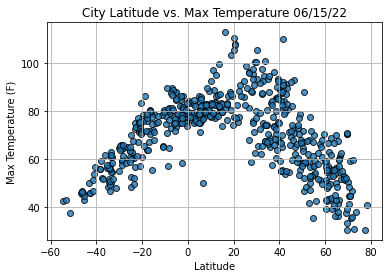

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

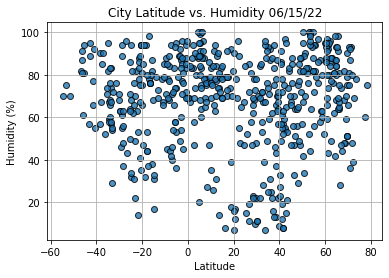

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

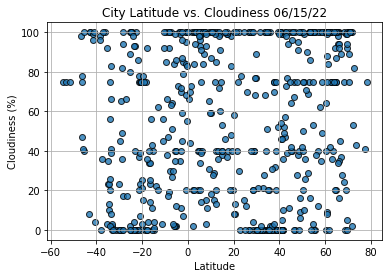

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

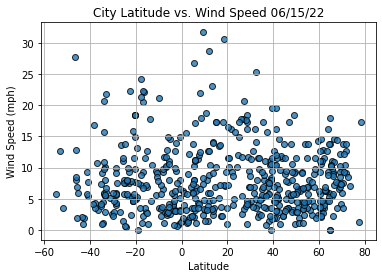

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()